In [1]:
%load_ext autoreload
%autoreload 2

In [18]:
from network_model import *

import sys
#!{sys.executable} -m pip install [arg]
from scipy.stats import gengamma


import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})
USE_TEX = False
if USE_TEX:
    plt.rc("text", usetex=True)
    plt.rc("text.latex", preamble=r"""
     \usepackage{times}
     \usepackage{mathptmx}""")
else:
    plt.rc("text", usetex=False)
plt.rc("font", family="serif")

In [13]:
N = 500

In [14]:
g = nx.powerlaw_cluster_graph(n=N, m=2, p=0.5)

In [125]:
W, I, communities, gamma_pos, success, allocations, C = simulation(
    
    NUM_AGENTS=N,
    STEPS=30,
    PROJECT_COST=0.1,
    graph=g,
    seed=123,
    use_data=False,
    DEFAULT_A=0.5,
    
)

100 communities.
[0.16753817 0.16031065 0.3179512  0.30090586 0.20037125 0.26350123
 0.06433632 0.21074838 0.25110791 0.13785863 0.30984654 0.14418622
 0.20124824 0.40571709 0.21597455 0.16144239 0.22089794 0.22603984
 0.25736454 0.16379076 0.18157423 0.18913916 0.11959107 0.25858937
 0.22822283 0.16531559 0.23409672 0.26895576 0.2207473  0.10735064
 0.23609216 0.13216598 0.18360437 0.27504695 0.31917763 0.15030753
 0.19706484 0.17845511 0.10822537 0.24331791 0.08117935 0.29648361
 0.39050787 0.21169203 0.06886718 0.26374027 0.32012475 0.07073449
 0.28297506 0.25432487 0.20184839 0.13122199 0.21803181 0.17878801
 0.18718213 0.35879791 0.2724812  0.22651286 0.06091011 0.16293512
 0.17026642 0.12445391 0.28660404 0.11460096 0.12799638 0.23390663
 0.08868463 0.21523991 0.24357285 0.23248902 0.25814761 0.08679965
 0.0993118  0.1517488  0.34086391 0.11774233 0.19232645 0.23302817
 0.31043816 0.0839274  0.33809745 0.07425299 0.12205304 0.30655661
 0.0446517  0.18060987 0.33458529 0.4229709  

100%|██████████| 500/500 [02:28<00:00,  3.37it/s]


Performing time stepping...


100%|██████████| 30/30 [00:18<00:00,  1.64it/s]


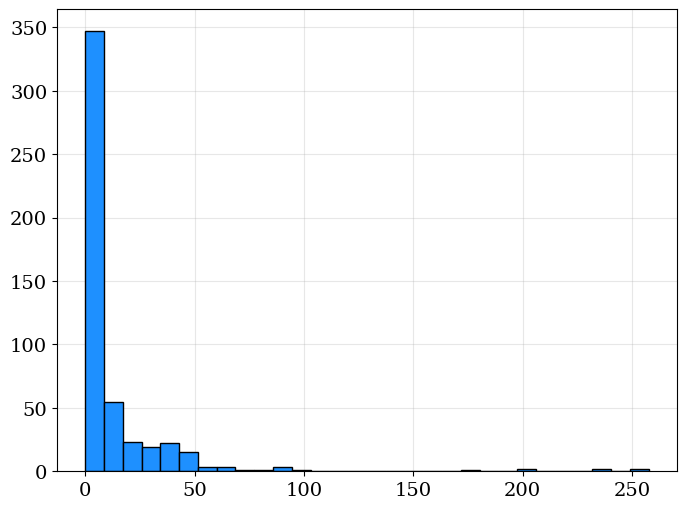

In [126]:
plt.hist(W[-1], bins=30, color="dodgerblue", edgecolor="k")
plt.show()

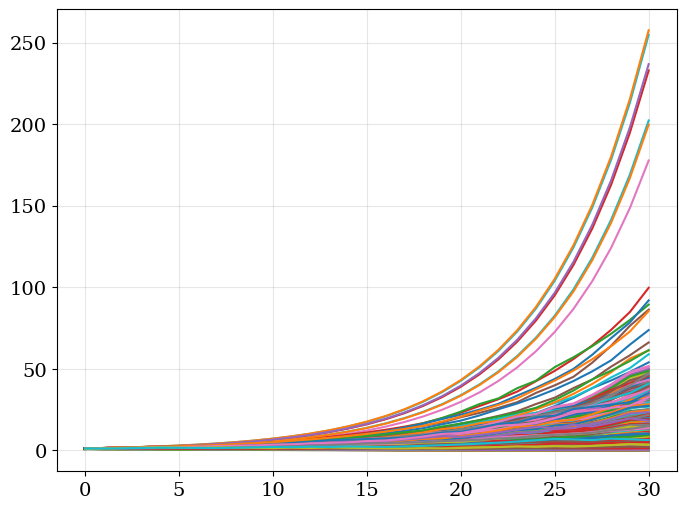

In [127]:
for i in range(W.shape[1]):
    plt.plot(W[:,i])

plt.xticks(np.arange(0, len(W), 5))
plt.show()

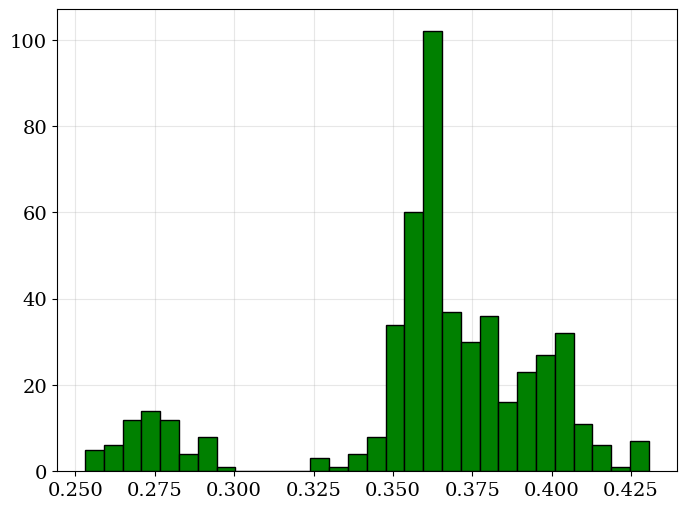

In [128]:
plt.hist(C, bins=30, color="g", edgecolor="k")
plt.show()

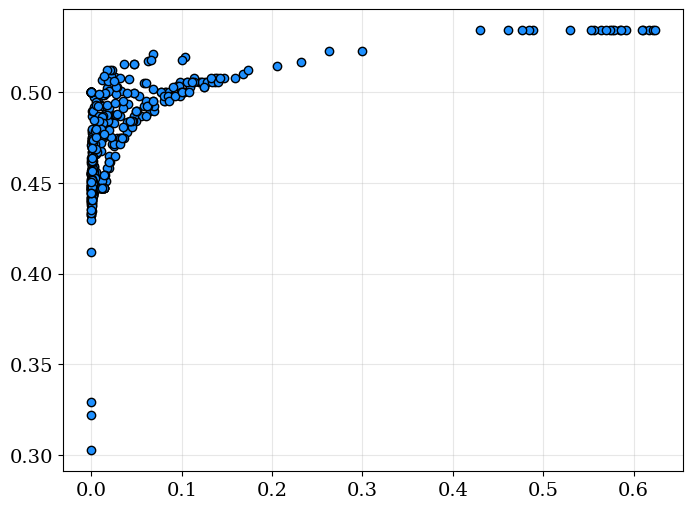

In [115]:
plt.scatter(W[-1], C, color="dodgerblue", edgecolor='k')
plt.show()

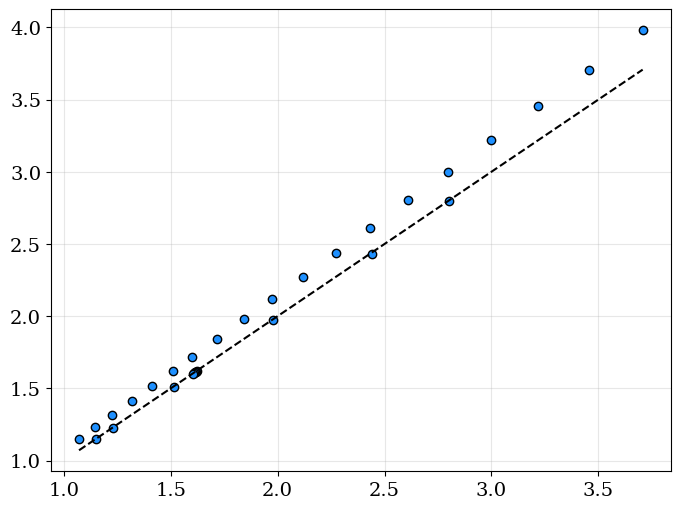

In [15]:
i = 12

x=[]
y=[]
for k in range(len(W)-1):
    x.append(W[k][i])
    y.append(W[k+1][i])

plt.scatter(x,y, color="dodgerblue", edgecolor="k")
plt.plot(np.linspace(min(x), max(x), 100), np.linspace(min(x), max(x), 100), color="k", linestyle="dashed")
plt.show()